In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [3]:
actual_data=pd.read_csv('covid_19_data.csv')

In [4]:
actual_data.shape

(306429, 8)

In [5]:
actual_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228329 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


In [6]:
actual_data

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0


In [7]:
actual_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
actual_data.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [9]:
clean_data=actual_data.drop(['Province/State'],axis=1)

In [10]:
clean_data.isna().sum()

SNo                0
ObservationDate    0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

In [11]:
clean_data['ObservationDate']=pd.to_datetime(clean_data['ObservationDate'])

In [12]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   SNo              306429 non-null  int64         
 1   ObservationDate  306429 non-null  datetime64[ns]
 2   Country/Region   306429 non-null  object        
 3   Last Update      306429 non-null  object        
 4   Confirmed        306429 non-null  float64       
 5   Deaths           306429 non-null  float64       
 6   Recovered        306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 16.4+ MB


In [13]:
clean_data.head(20)

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
5,6,2020-01-22,Mainland China,1/22/2020 17:00,26.0,0.0,0.0
6,7,2020-01-22,Mainland China,1/22/2020 17:00,2.0,0.0,0.0
7,8,2020-01-22,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
8,9,2020-01-22,Mainland China,1/22/2020 17:00,4.0,0.0,0.0
9,10,2020-01-22,Mainland China,1/22/2020 17:00,1.0,0.0,0.0


In [14]:
case_over_time=clean_data.groupby('ObservationDate')['Confirmed','Deaths','Recovered'].sum()

C:\Users\ADITYA GUPTA\AppData\Local\Temp\ipykernel_9292\3607692126.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  case_over_time=clean_data.groupby('ObservationDate')['Confirmed','Deaths','Recovered'].sum()


In [15]:
case_over_time

,Confirmed,Deaths,Recovered
ObservationDate,,,
2020-01-22,557.0,17.0,30.0
2020-01-23,1097.0,34.0,60.0
2020-01-24,941.0,26.0,39.0
2020-01-25,1437.0,42.0,42.0
2020-01-26,2118.0,56.0,56.0
...,...,...,...
2021-05-25,167848207.0,3485788.0,104824935.0
2021-05-26,168416423.0,3498544.0,105380748.0
2021-05-27,168970791.0,3511297.0,106078106.0


<AxesSubplot:xlabel='ObservationDate'>

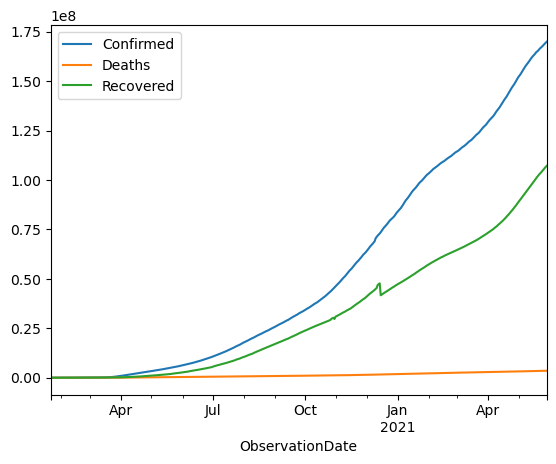

In [16]:
import seaborn as sns
case_over_time.plot()

In [17]:
clean_data.head()

,SNo,ObservationDate,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,2020-01-22,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,2020-01-22,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,2020-01-22,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,2020-01-22,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,2020-01-22,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [20]:
country=clean_data.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum()

C:\Users\ADITYA GUPTA\AppData\Local\Temp\ipykernel_9292\1456148912.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country=clean_data.groupby('Country/Region')['Confirmed','Deaths','Recovered'].sum()


In [21]:
country

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0
...,...,...,...
West Bank and Gaza,41819444.0,440378.0,37003116.0
Yemen,962066.0,237613.0,506523.0
Zambia,13493953.0,205990.0,12625626.0


In [22]:
country.head()

,Confirmed,Deaths,Recovered
Country/Region,,,
Azerbaijan,1.0,0.0,0.0
"('St. Martin',)",2.0,0.0,0.0
Afghanistan,17026442.0,669075.0,13464399.0
Albania,19768869.0,375955.0,13945256.0
Algeria,27684358.0,834464.0,18959299.0


<AxesSubplot:xlabel='Country/Region'>

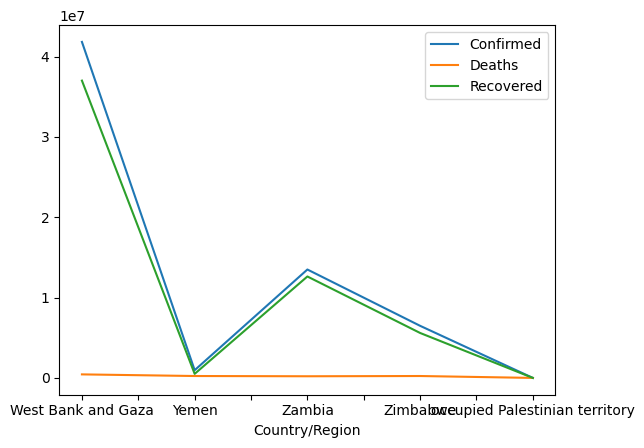

In [30]:
country.tail(5).plot()

<AxesSubplot:xlabel='Country/Region'>

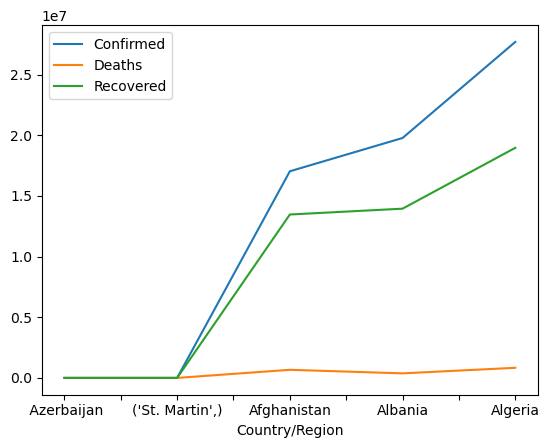

In [27]:
country.head(5).plot()

<BarContainer object of 5 artists>

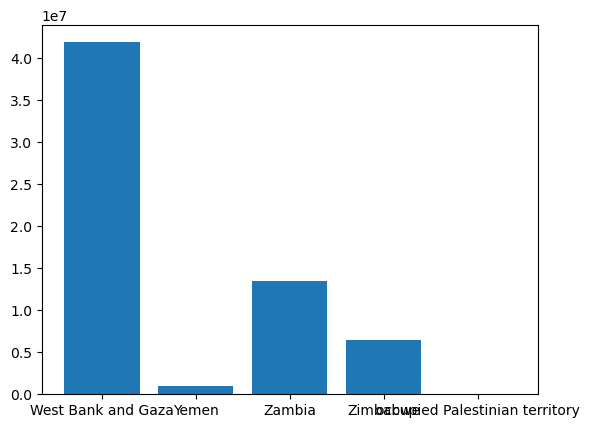

In [24]:
top5=country.tail(5)
plt.bar(top5.index,top5['Confirmed'])

<BarContainer object of 5 artists>

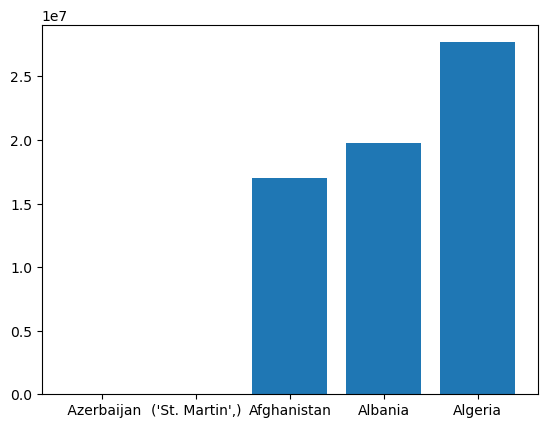

In [25]:
top5=country.head(5)
plt.bar(top5.index,top5['Confirmed'])

<BarContainer object of 5 artists>

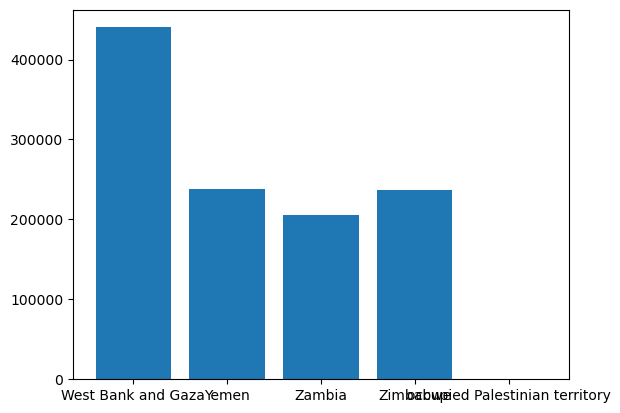

In [28]:
top5=country.tail(5)
plt.bar(top5.index,top5['Deaths'])

<BarContainer object of 5 artists>

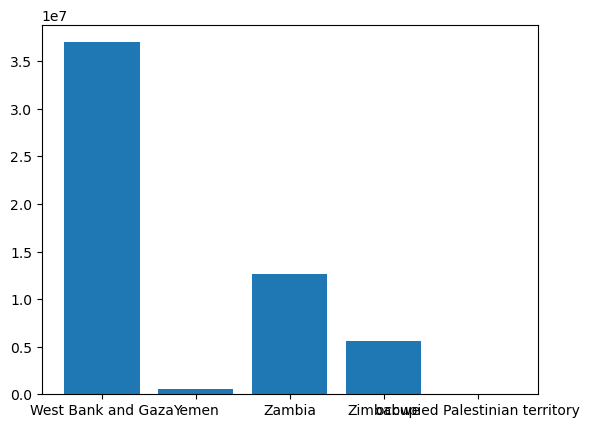

In [29]:
top5=country.tail(5)
plt.bar(top5.index,top5['Recovered'])